In [153]:
%pip install nbformat 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [154]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as mm
from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split

In [155]:
df = pd.read_excel (r'C:\Users\jwiggins\Downloads\January 2017 Crude Diet Yields and Product Stream Quality.xlsx',None)
sheets=pd.DataFrame(df.keys())
sheets_lower_underscore=sheets.applymap(lambda x: x.lower().replace(' ','_'))
sheets_lower_underscore

,0
0,vps2_crude_diet
1,vps2_yields
2,vps2_strmq
3,vps4_crude_diet
4,vps4_yields
5,vps4_strmq
6,vps5_crude_diet
7,vps5_yields
8,vps5_strmq


In [156]:
import pandas as pd

vps5_crude_diet = pd.read_excel (r'C:\Users\jwiggins\Downloads\January 2017 Crude Diet Yields and Product Stream Quality.xlsx',sheet_name='VPS5 Crude Diet', header=[5]).iloc[1:,:]
vps5_yields = pd.read_excel (r'C:\Users\jwiggins\Downloads\January 2017 Crude Diet Yields and Product Stream Quality.xlsx',sheet_name='VPS5 Yields', header=[5]).iloc[1:,:]
vps5_strmq = pd.read_excel (r'C:\Users\jwiggins\Downloads\January 2017 Crude Diet Yields and Product Stream Quality.xlsx',sheet_name='VPS5 StrmQ', header=[6]).iloc[1:,:]

all_data=pd.concat([vps5_crude_diet,vps5_yields,vps5_strmq],axis=1)

In [157]:
all_data.dtypes

Date        object
FP5FAPI    float64
FP5FSUL    float64
FP5FNIT    float64
FP5FV40    float64
            ...   
MNI        float64
MVA        float64
CON.4      float64
V50        float64
TAN.2      float64
Length: 148, dtype: object

In [158]:
def data_feed(csv):
    dropped_date = csv.select_dtypes(exclude=['datetime','object']).fillna(value=0).iloc[:30]
    data_input_scaled=ss().fit_transform(dropped_date)
    (x_train,x_test) = train_test_split(data_input_scaled,test_size=0.2,random_state=42)
    return x_train,x_test

In [159]:
data_feed(all_data)[0].dtype

dtype('float64')

In [173]:
def cnn_model(data_input):
    info=data_feed(data_input)
    model = tf.keras.models.Sequential()

    # model.build(input_shape=(info[0].shape[1]))
    # First hidden layer
    #  YOUR CODE GOES HERE
    # model.add(tf.keras.layers.Conv1D(12,3,activation="relu",padding='same',input_shape=(info[0].shape[1],1)))
    # model.add(tf.keras.layers.MaxPool1D(pool_size=2,data_format='channels_last',padding='same'))
    # # # model.add(tf.keras.layers.Dropout(0.1))
    # model.add(tf.keras.layers.Conv1D(32,3,activation="relu",padding='same'))
    # model.add(tf.keras.layers.MaxPool1D(pool_size=2,data_format='channels_last',padding='same'))
    # # model.add(tf.keras.layers.Dropout(0.1))
    # model.add(tf.keras.layers.Conv1D(64,5,activation="relu",padding='same'))
    # model.add(tf.keras.layers.MaxPool1D(pool_size=2,data_format='channels_last',padding='same'))
    # model.add(tf.keras.layers.Conv1D(64,5,activation="relu",padding='same'))
    # model.add(tf.keras.layers.UpSampling1D(2))
    # # nn_model.add(tf.keras.layers.Dropout(0.1))
    # model.add(tf.keras.layers.Conv1D(32,3,activation="relu",padding='same'))
    # model.add(tf.keras.layers.UpSampling1D(2))
    # # nn_model.add(tf.keras.layers.Dropout(0.1))
    # model.add(tf.keras.layers.Conv1D(12,3,activation="relu",padding='same'))
    # model.add(tf.keras.layers.UpSampling1D(2))


    model.add(tf.keras.layers.Conv1D(filters=4, kernel_size=3, activation='relu', input_shape=(info[0].shape[1],1)))
    model.add(tf.keras.layers.MaxPool1D(pool_size=2))
    model.add(tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation='relu'))
    model.add(tf.keras.layers.MaxPool1D(pool_size=2))
    # model.add(tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation='relu'))
    # model.add(tf.keras.layers.MaxPool1D(pool_size=2))
    # model.add(tf.keras.layers.Dense(units=64, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=16, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=4, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=1, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=4, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=16, activation='relu'))
    # model.add(tf.keras.layers.Dense(units=64, activation='relu'))




    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=50, activation='relu'))

    model.add(tf.keras.layers.Dense(units=info[0].shape[1], activation='linear'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae','accuracy'])
    es = tf.keras.callbacks.EarlyStopping(monitor='val_mse',patience=30,verbose=1,mode='min')
    # checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath ="/content/sample_data")
    tbCallBack = tf.keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=1, write_graph=True, write_images=True)
    cb_list = [es,tbCallBack]
    model.fit(info[0], info[0], epochs=10000,validation_split=.05,shuffle=False,callbacks=cb_list)
    model.evaluate(info[0], info[0])
    return model


In [174]:
m=cnn_model(all_data)

m.summary()

Epoch 1/10000
1/1 [==============================] - 1s 612ms/step - loss: 1.0054 - mse: 1.0054 - mae: 0.7097 - accuracy: 0.0000e+00 - val_loss: 0.7647 - val_mse: 0.7647 - val_mae: 0.6255 - val_accuracy: 0.0000e+00
Epoch 2/10000
1/1 [==============================] - 0s 102ms/step - loss: 0.9909 - mse: 0.9909 - mae: 0.7042 - accuracy: 0.0455 - val_loss: 0.7572 - val_mse: 0.7572 - val_mae: 0.6231 - val_accuracy: 0.0000e+00
Epoch 3/10000
1/1 [==============================] - 0s 111ms/step - loss: 0.9780 - mse: 0.9780 - mae: 0.6993 - accuracy: 0.0455 - val_loss: 0.7504 - val_mse: 0.7504 - val_mae: 0.6208 - val_accuracy: 0.0000e+00
Epoch 4/10000
1/1 [==============================] - 0s 103ms/step - loss: 0.9663 - mse: 0.9663 - mae: 0.6949 - accuracy: 0.0455 - val_loss: 0.7444 - val_mse: 0.7444 - val_mae: 0.6187 - val_accuracy: 0.0000e+00
Epoch 5/10000
1/1 [==============================] - 0s 121ms/step - loss: 0.9556 - mse: 0.9556 - mae: 0.6908 - accuracy: 0.0000e+00 - val_loss: 0.7389 

In [175]:
import matplotlib.pyplot as plt
data_mod=data_feed(all_data)
reconstructions = m.predict(data_mod[0])
train_loss = tf.keras.losses.mae(reconstructions, data_mod[0])

import plotly.express as px
import numpy as np
df_loss = pd.DataFrame(train_loss)
x=range(0,len(df_loss))
y=df_loss.iloc[:,0]
fig = px.line(x=x,y=y)
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

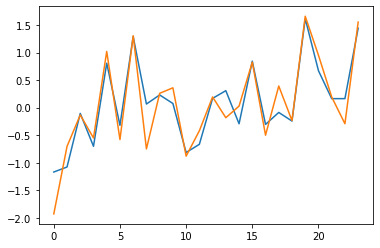

In [179]:
x=list(range(0,len(pd.DataFrame(data_mod[0]).iloc[:,1])))
y=pd.DataFrame(reconstructions).iloc[:,2]
x1=list(range(0,len(pd.DataFrame(data_mod[0]).iloc[:,1])))
y1=pd.DataFrame(data_mod[0]).iloc[:,2]
plt.plot(x,y)
plt.plot(x1,y1)
# plt.plot(x1,y1)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

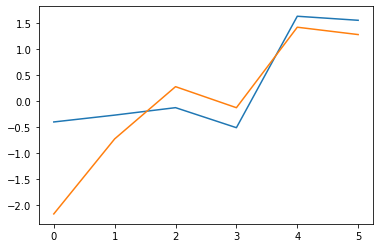

In [183]:
reconstructions_test = m.predict(data_mod[1])
x=list(range(0,len(pd.DataFrame(data_mod[1]).iloc[:,0])))
y=pd.DataFrame(reconstructions_test).iloc[:,4]
x1=list(range(0,len(pd.DataFrame(data_mod[1]).iloc[:,1])))
y1=pd.DataFrame(data_mod[1]).iloc[:,4]
plt.plot(x,y)
plt.plot(x1,y1)
# plt.plot(x1,y1)
plt.show